[*********************100%***********************]  1 of 1 completed


Acurácia do modelo: 0.47
Dados históricos salvos em 'bitcoin_prices.csv'


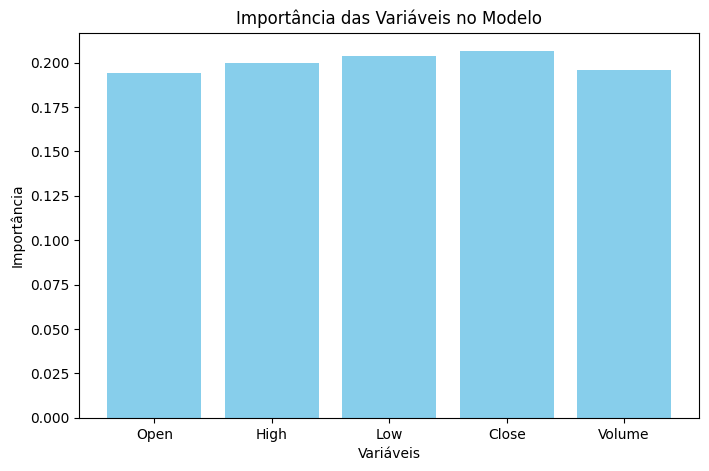

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Baixar dados históricos do Bitcoin
symbol = "BTC-USD"
data = yf.download(symbol, period="1y", interval="1d", auto_adjust=False)

# Criar variável alvo: 1 se o preço de fechamento do próximo dia for maior, 0 caso contrário
data["Target"] = (data["Close"].shift(-1) > data["Close"]).astype(int)

# Selecionar recursos para o modelo
features = ["Open", "High", "Low", "Close", "Volume"]
X = data[features].dropna()
y = data["Target"].dropna()

# Ajustar tamanhos das amostras
X = X.iloc[:-1, :]
y = y.iloc[:-1]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

# Salvar dados em CSV
data.to_csv("bitcoin_prices.csv")
print("Dados históricos salvos em 'bitcoin_prices.csv'")

# Visualizar importância das variáveis
importances = model.feature_importances_
plt.figure(figsize=(8, 5))
plt.bar(features, importances, color="skyblue")
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.title("Importância das Variáveis no Modelo")
plt.show()